In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set_style('whitegrid')

In [15]:
df = pd.read_csv('SampleSuperstore.csv')

In [17]:
print("Primeras 5 filas del DataFrame:")
print(df.head())
print("\nInformación del DataFrame:")
df.info()

Primeras 5 filas del DataFrame:
        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00 

In [18]:
category_summary = df.groupby('Category').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).sort_values(by='Total_Sales', ascending=False)

/tmp/ipython-input-953993886.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_summary.index, y=category_summary['Total_Sales'], palette='viridis')


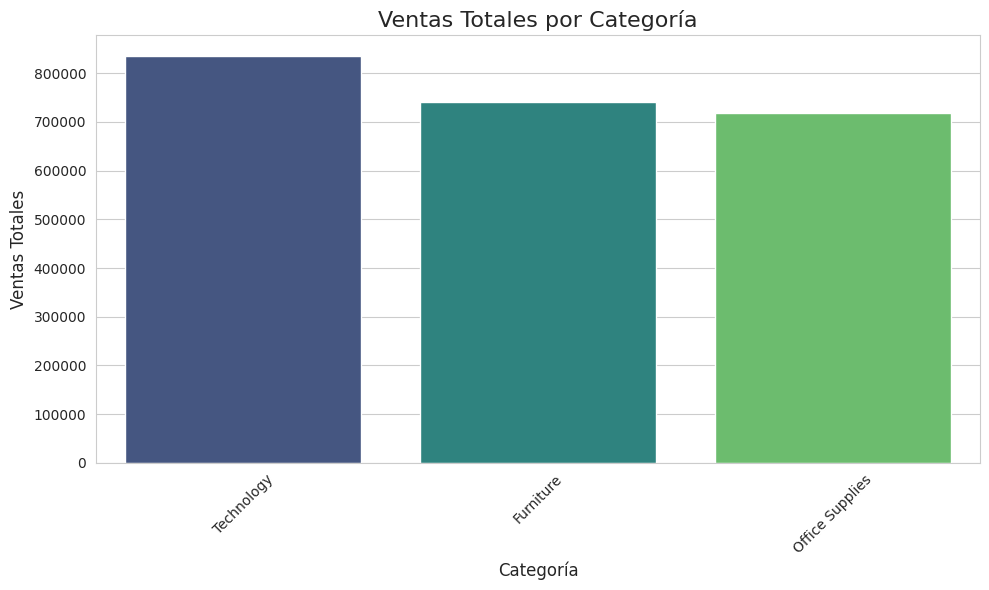

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=category_summary.index, y=category_summary['Total_Sales'], palette='viridis')
plt.title('Ventas Totales por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [20]:
sub_category_sales = df.groupby('Sub-Category')['Sales'].sum().nlargest(10).sort_values(ascending=True)
sub_category_quantity = df.groupby('Sub-Category')['Quantity'].sum().nlargest(10).sort_values(ascending=True)

/tmp/ipython-input-4286209545.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_category_sales.values, y=sub_category_sales.index, palette='rocket')


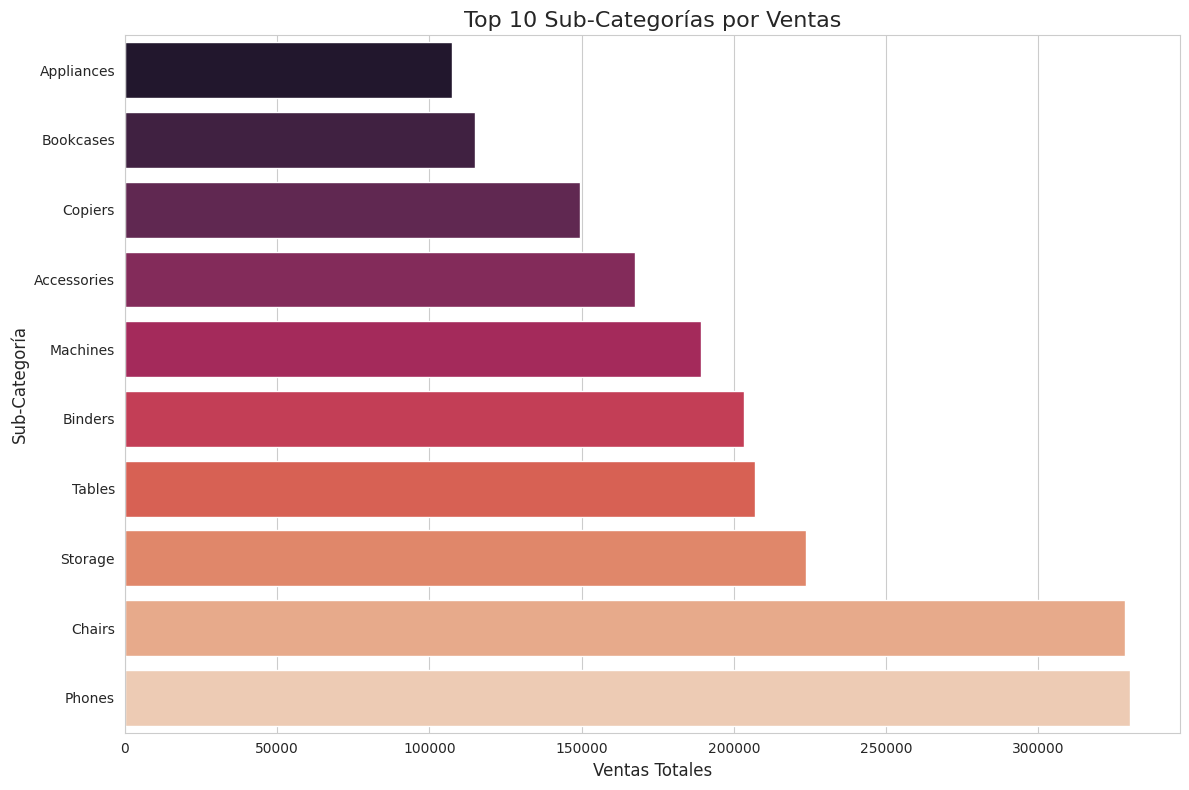

In [21]:
plt.figure(figsize=(12, 8))
sns.barplot(x=sub_category_sales.values, y=sub_category_sales.index, palette='rocket')
plt.title('Top 10 Sub-Categorías por Ventas', fontsize=16)
plt.xlabel('Ventas Totales', fontsize=12)
plt.ylabel('Sub-Categoría', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-592397776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_category_quantity.values, y=sub_category_quantity.index, palette='mako')


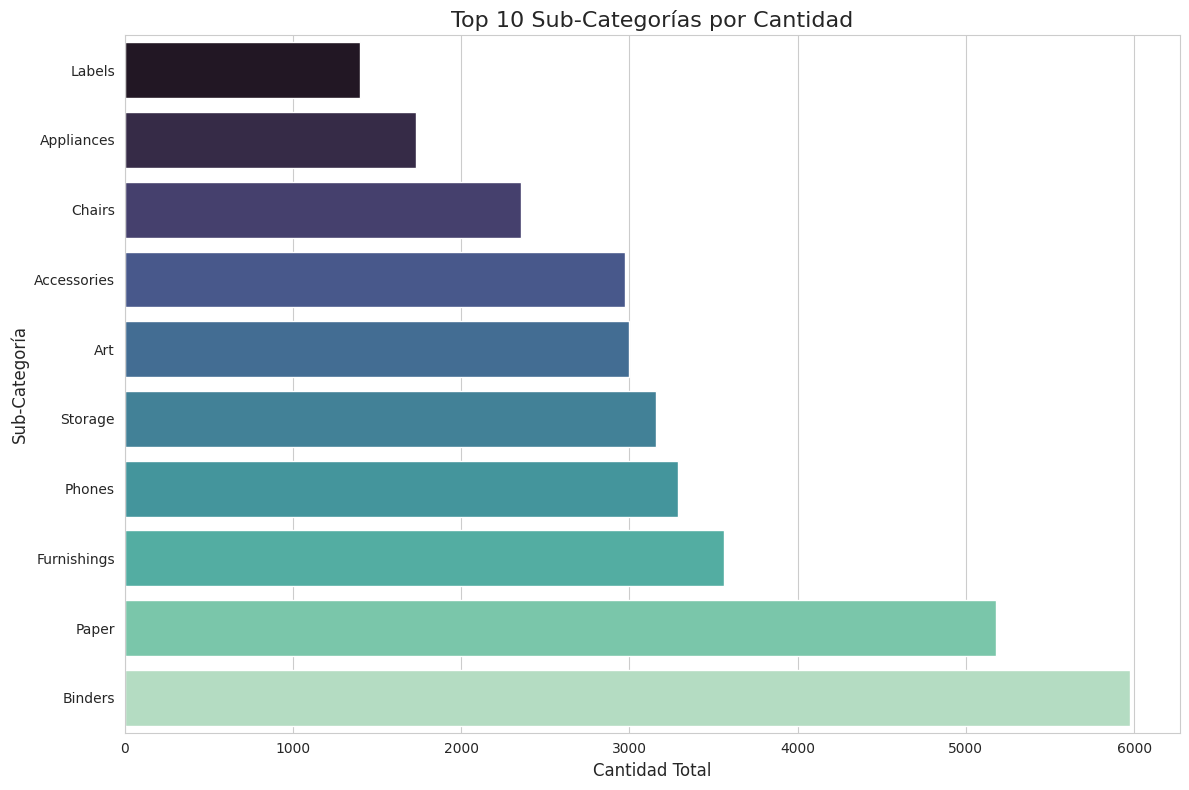

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x=sub_category_quantity.values, y=sub_category_quantity.index, palette='mako')
plt.title('Top 10 Sub-Categorías por Cantidad', fontsize=16)
plt.xlabel('Cantidad Total', fontsize=12)
plt.ylabel('Sub-Categoría', fontsize=12)
plt.tight_layout()
plt.show()

In [23]:
regional_summary = df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).sort_values(by='Total_Sales', ascending=False)

print("\nResumen de Ventas y Ganancias por Región:")
print(regional_summary)


Resumen de Ventas y Ganancias por Región:
         Total_Sales  Total_Profit
Region                            
West     725457.8245   108418.4489
East     678781.2400    91522.7800
Central  501239.8908    39706.3625
South    391721.9050    46749.4303


/tmp/ipython-input-2376383500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=regional_summary.index, y=regional_summary['Total_Sales'], palette='viridis')


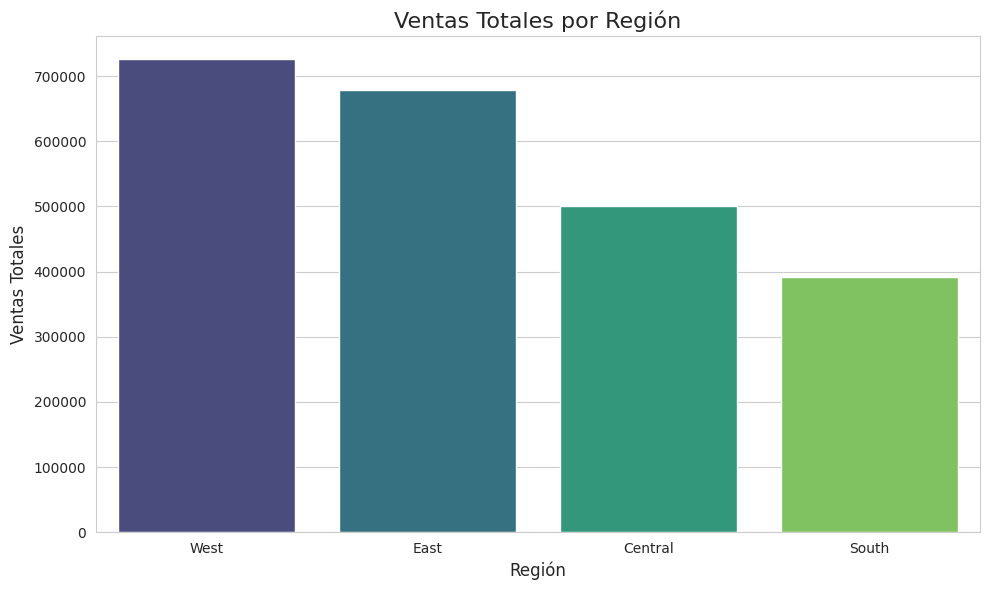

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x=regional_summary.index, y=regional_summary['Total_Sales'], palette='viridis')
plt.title('Ventas Totales por Región', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.tight_layout()
plt.show()

In [26]:
state_profit = df.groupby('State')['Profit'].sum().nlargest(10).sort_values(ascending=True)

/tmp/ipython-input-1034257270.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_profit.values, y=state_profit.index, palette='coolwarm')


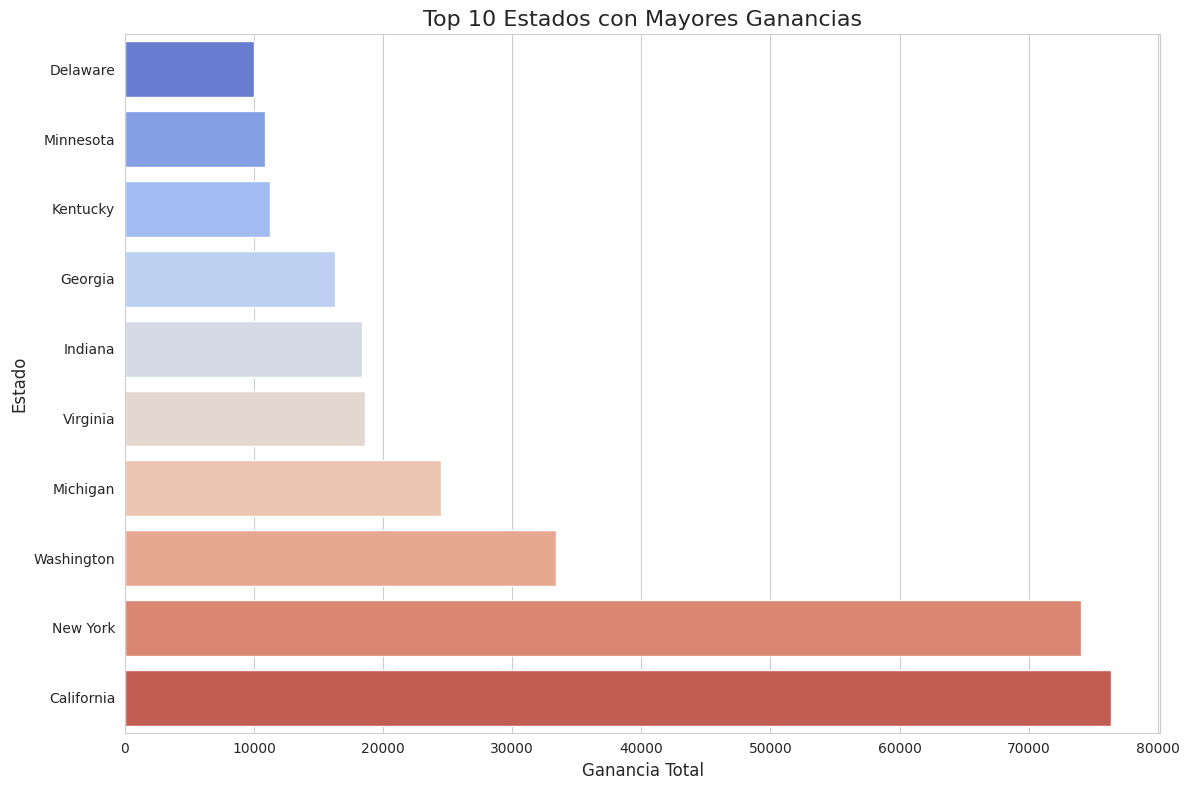

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(x=state_profit.values, y=state_profit.index, palette='coolwarm')
plt.title('Top 10 Estados con Mayores Ganancias', fontsize=16)
plt.xlabel('Ganancia Total', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.tight_layout()
plt.show()

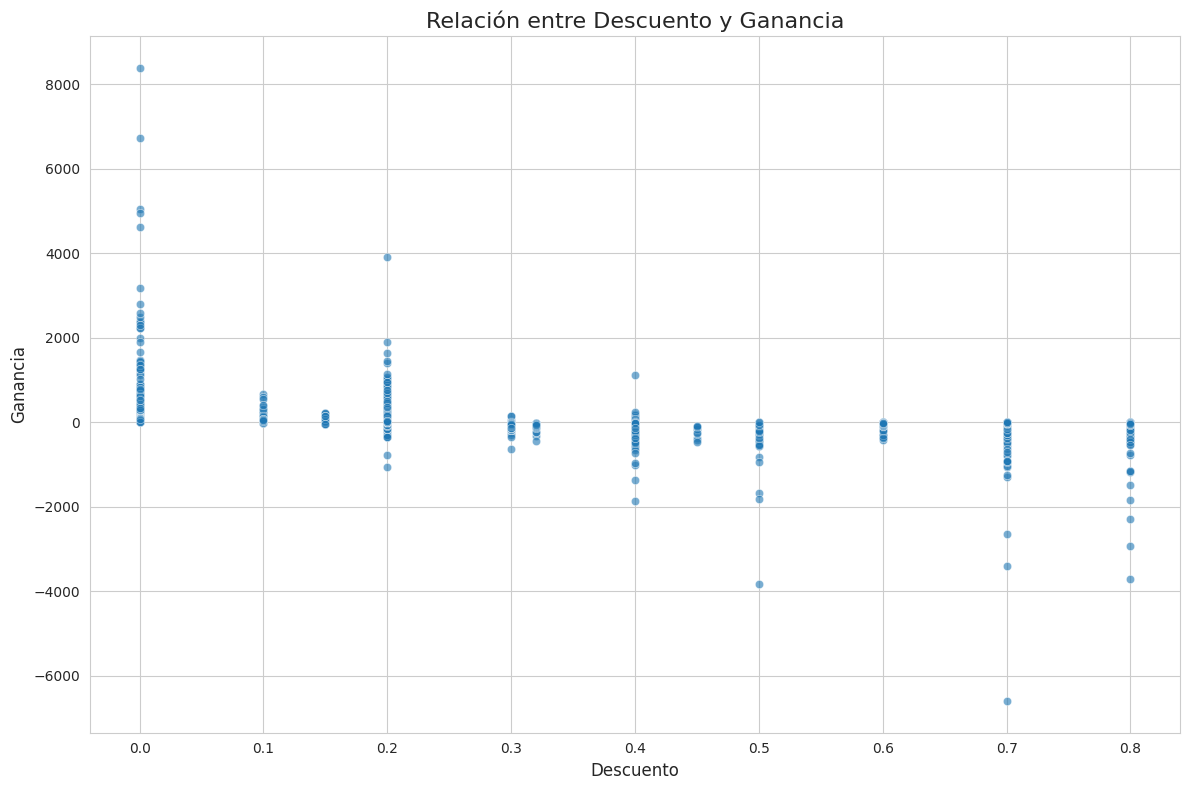

In [41]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.6)
plt.title('Relación entre Descuento y Ganancia', fontsize=16)
plt.xlabel('Descuento', fontsize=12)
plt.ylabel('Ganancia', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
segment_summary = df.groupby('Segment').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).sort_values(by='Total_Sales', ascending=False)

print("\nVentas y Ganancias por Segmento de Cliente:")
print(segment_summary)


Ventas y Ganancias por Segmento de Cliente:
              Total_Sales  Total_Profit
Segment                                
Consumer     1.161401e+06   134119.2092
Corporate    7.061464e+05    91979.1340
Home Office  4.296531e+05    60298.6785


/tmp/ipython-input-1532072477.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_summary.index, y=segment_summary['Total_Sales'], palette='viridis')


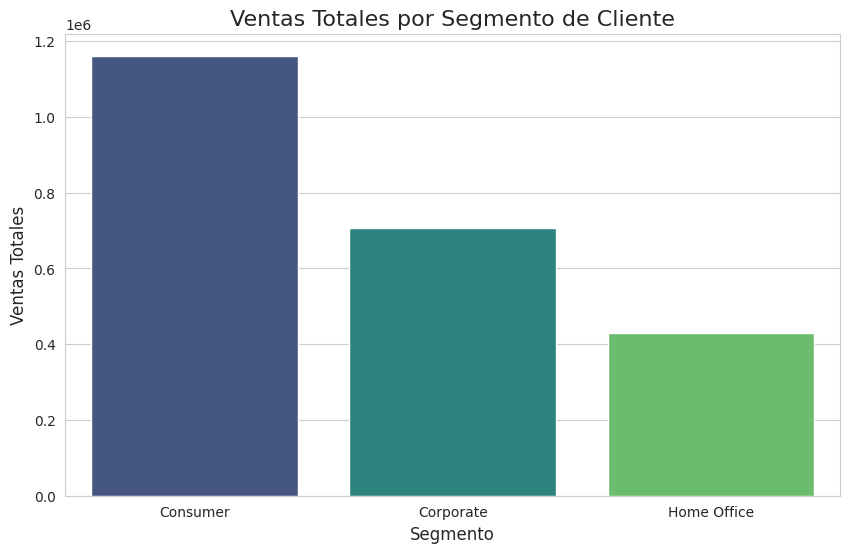

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_summary.index, y=segment_summary['Total_Sales'], palette='viridis')
plt.title('Ventas Totales por Segmento de Cliente', fontsize=16)
plt.xlabel('Segmento', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.show()

/tmp/ipython-input-2667510288.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_summary.index, y=segment_summary['Total_Profit'], palette='plasma')


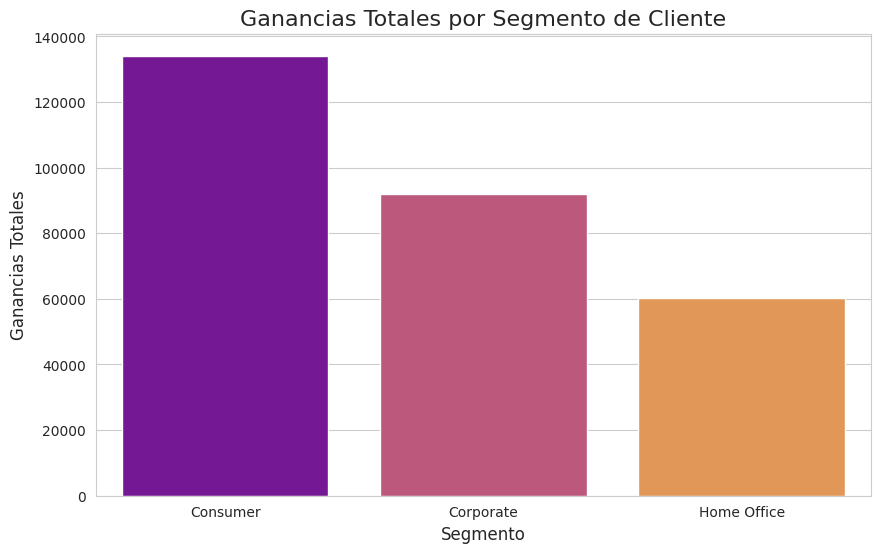

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x=segment_summary.index, y=segment_summary['Total_Profit'], palette='plasma')
plt.title('Ganancias Totales por Segmento de Cliente', fontsize=16)
plt.xlabel('Segmento', fontsize=12)
plt.ylabel('Ganancias Totales', fontsize=12)
plt.show()

In [32]:
ship_mode_sales = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)

In [33]:
print("\nVentas por Modo de Envío:")
print(ship_mode_sales)


Ventas por Modo de Envío:
Ship Mode
Standard Class    1.358216e+06
Second Class      4.591936e+05
First Class       3.514284e+05
Same Day          1.283631e+05
Name: Sales, dtype: float64


/tmp/ipython-input-2971395544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ship_mode_sales.index, y=ship_mode_sales.values, palette='mako')


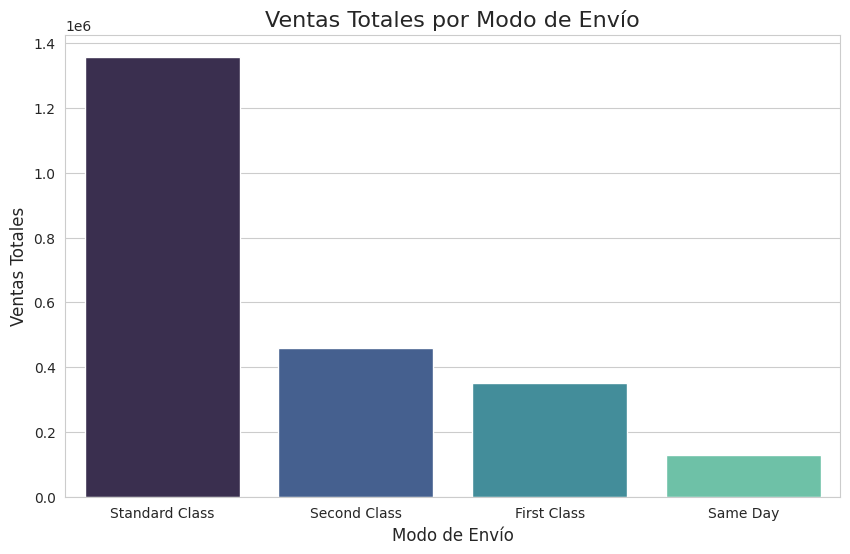

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ship_mode_sales.index, y=ship_mode_sales.values, palette='mako')
plt.title('Ventas Totales por Modo de Envío', fontsize=16)
plt.xlabel('Modo de Envío', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.show()

In [35]:
profit_margin_by_category = df.groupby('Category').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).sort_values(ascending=False)
profit_margin_by_category = profit_margin_by_category.reset_index(name='Profit Margin (%)')

/tmp/ipython-input-4067648641.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  profit_margin_by_category = df.groupby('Category').apply(lambda x: (x['Profit'].sum() / x['Sales'].sum()) * 100).sort_values(ascending=False)


In [36]:
print("\nMargen de Ganancia por Categoría:")
print(profit_margin_by_category)


Margen de Ganancia por Categoría:
          Category  Profit Margin (%)
0       Technology          17.395712
1  Office Supplies          17.035158
2        Furniture           2.486695


/tmp/ipython-input-3483308703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit Margin (%)', data=profit_margin_by_category, palette='viridis')


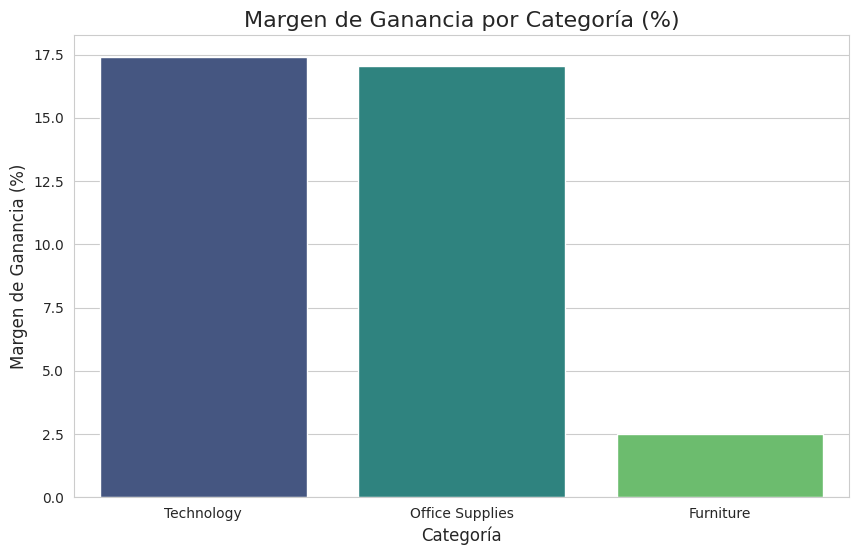

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit Margin (%)', data=profit_margin_by_category, palette='viridis')
plt.title('Margen de Ganancia por Categoría (%)', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Margen de Ganancia (%)', fontsize=12)
plt.show()

In [39]:
category_summary = df.groupby('Category').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).sort_values(by='Total_Sales', ascending=False)

In [42]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

In [43]:
profit_by_category = profit_by_category.sort_values(by='Profit', ascending=False)


/tmp/ipython-input-1773416415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=profit_by_category, palette='coolwarm')


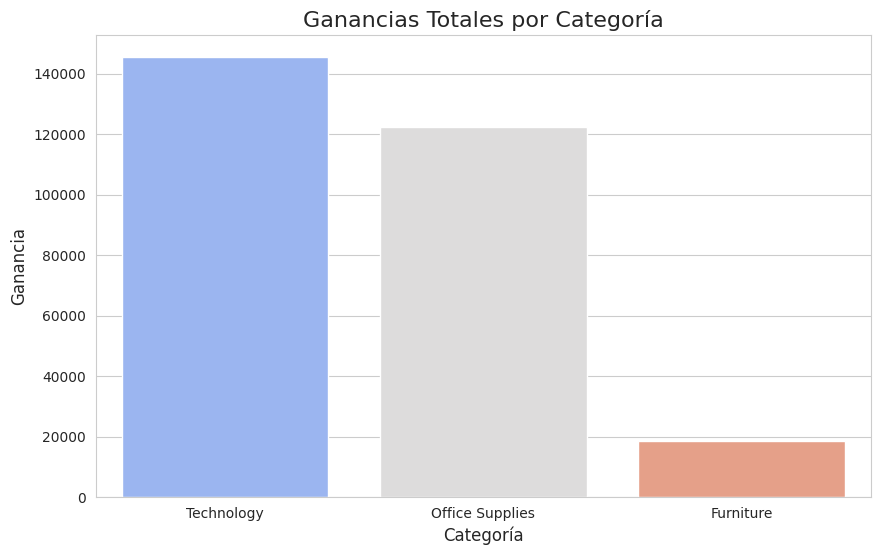

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=profit_by_category, palette='coolwarm')
plt.title('Ganancias Totales por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Ganancia', fontsize=12)
plt.show()